In [1]:
import pandas as pd
import uuid
from pathlib import Path
import matplotlib.pyplot as plt
import shutil

In [5]:
pairs = pd.read_csv("pairs.csv")

In [141]:
version = uuid.uuid4().hex

folder_name = Path(version)
folder_name.mkdir(parents=True, exist_ok=True)

INTERVAL = 1

print(version)

48b7c6a8e372489688f3b4d3dedd3092


In [142]:
for i, row in pairs.iterrows():
    base, quote = row["base"], row["quote"]
    file = f"Kraken_OHLCVT/{base}{quote}_{INTERVAL}.csv"

    print(base, quote)

    try:
        df = pd.read_csv(file, names=["timestamp", "open", "high", "low", "close", "volume", "trades"], header=None)

        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
        df.set_index('timestamp', inplace=True)

        df['average_price'] = (df['high'] + df['low']) / 2

        daily_twap = df.resample('D')['average_price'].mean()

        df['weighted_price'] = df['close'] * df['volume']
        daily_vwap = df.resample('D').apply({
            'weighted_price': 'sum',
            'volume': 'sum'
        })

        daily_vwap['vwap'] = daily_vwap['weighted_price'] / daily_vwap['volume']

        daily_data = df.resample('D').agg({
            'open': 'first',
            'high': 'max',
            'low': 'min',
            'close': 'last',
            'volume': 'sum',
            'trades': 'sum'
        })

        daily_data['twap'] = daily_twap
        daily_data['vwap'] = daily_vwap['vwap']

        daily_data.to_parquet(f"{version}/{base}_{quote}.parquet")


    except Exception as e:
        print("ERROR", (base, quote), e)


shutil.make_archive(f"{version}", 'gztar', f"{version}")


1INCH EUR
1INCH USD
AAVE ETH
AAVE EUR
AAVE GBP
AAVE USD
AAVE XBT
ACA EUR
ACA USD
ACH EUR
ACH USD
ADA AUD
ADA ETH
ADA EUR
ADA GBP
ADA USDT
ADA USD
ADA XBT
ADX EUR
ADX USD
AGLD EUR
AGLD USD
AIR EUR
AIR USD
AKT EUR
AKT USD
ALCX EUR
ALCX USD
ALGO ETH
ALGO EUR
ALGO GBP
ALGO USDT
ALGO USD
ALGO XBT
ALICE EUR
ALICE USD
ALPHA EUR
ALPHA USD
ERROR ('ALPHA', 'USD') Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
ANKR EUR
ANKR USD
ANKR XBT
ANT ETH
ANT EUR
ANT USD
ANT XBT
APE EUR
APE USDT
APE USD
API3 EUR
API3 USD
APT EUR
APT USD
ARB EUR
ARB USD
ARPA EUR
ARPA USD
ASTR EUR
ASTR USD
ATLAS EUR
ATLAS USD
ATOM ETH
ATOM EUR
ATOM GBP
ATOM USDT
ATOM USD
ATOM XBT
AUDIO EUR
AUDIO USD
AUD JPY
AUD USD
AVAX EUR
AVAX USDT
AVAX USD
AXS EUR
AXS USD
BADGER EUR
BADGER USD
BAL EUR
BAL USD
BAL XBT
BAND EUR
BAND USD
BAT ETH
BAT EUR
BAT JPY
BAT USD
BAT XBT
BCH AUD
BCH ETH
BCH EUR
BCH GBP
BCH JPY
BCH USDT
BCH USD
BCH XBT
BEAM EUR
BEAM USD
BICO EUR
BICO USD
BIT EUR
BIT USD
BLUR E

DASH EUR
DASH USD
DASH XBT
DENT EUR
DENT USD
DOT ETH
DOT EUR


In [3]:
version = "e620a1906b0142b5b230a15668ff667b"

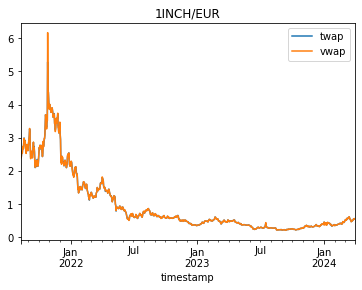

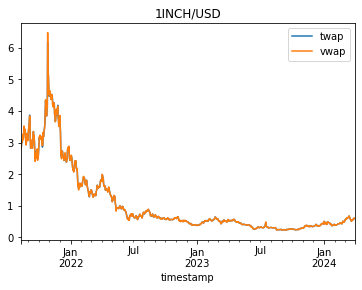

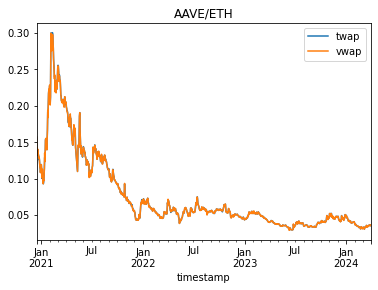

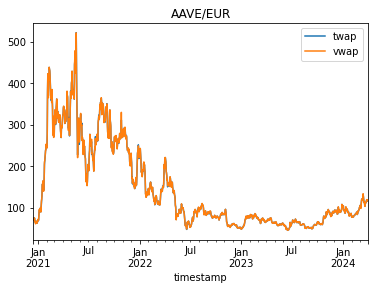

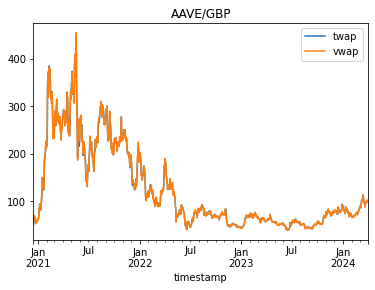

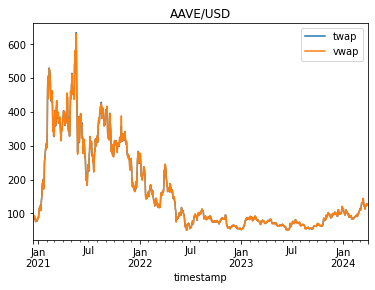

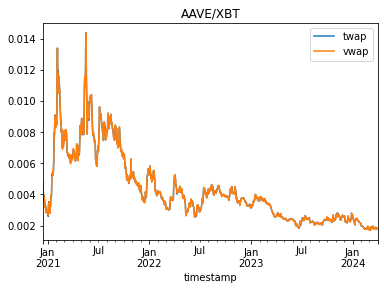

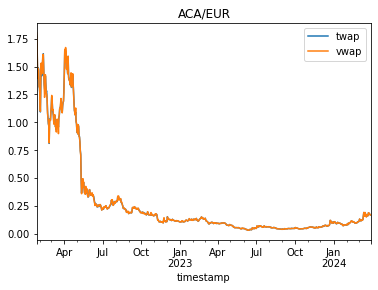

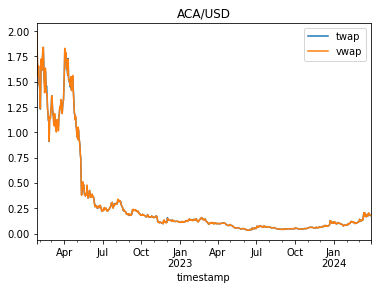

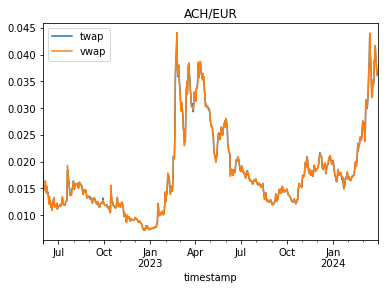

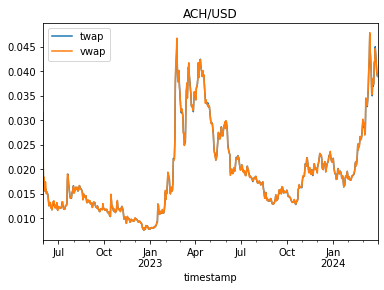

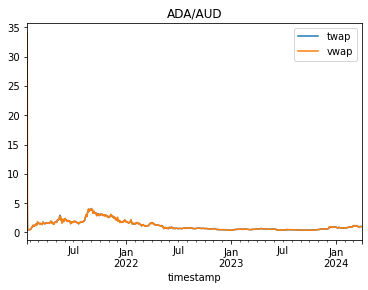

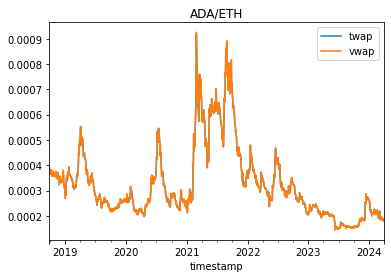

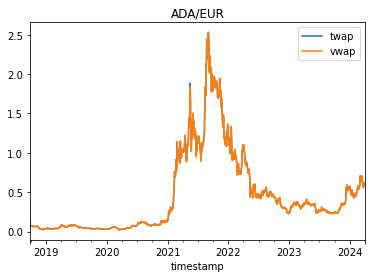

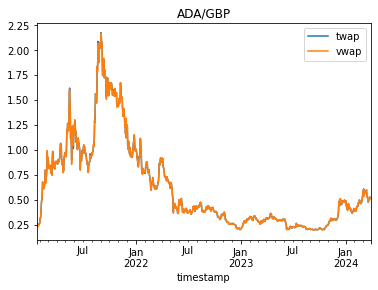

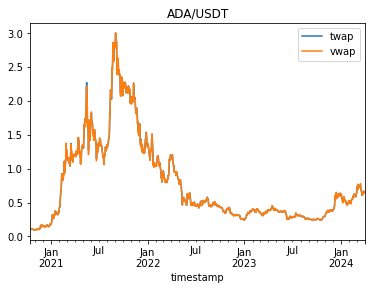

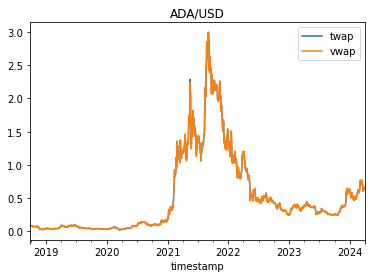

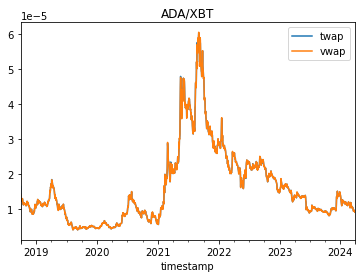

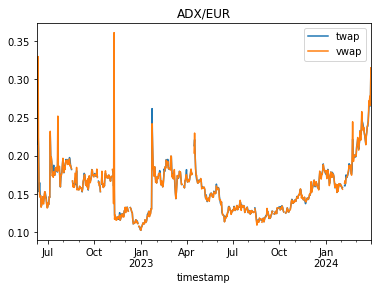

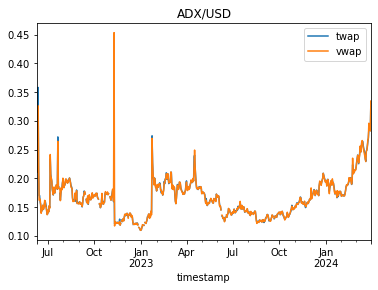

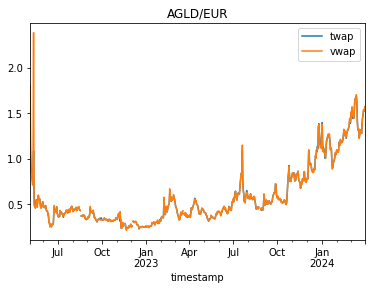

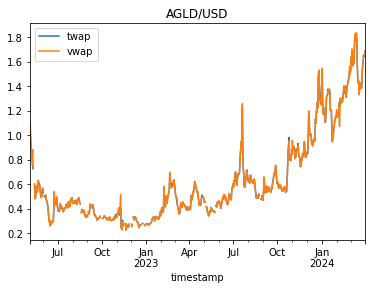

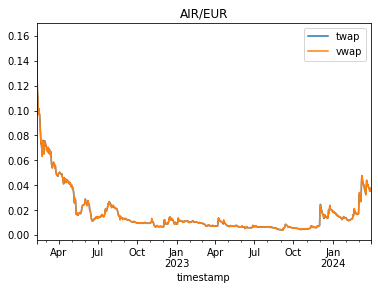

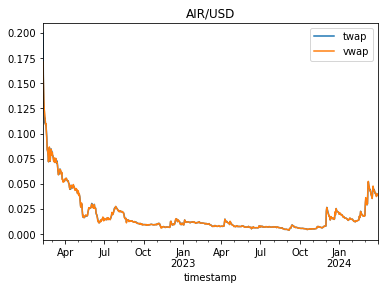

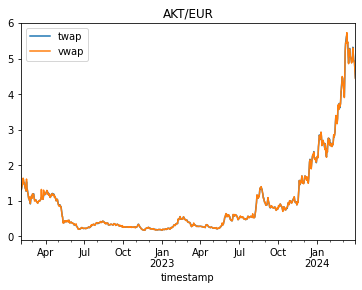

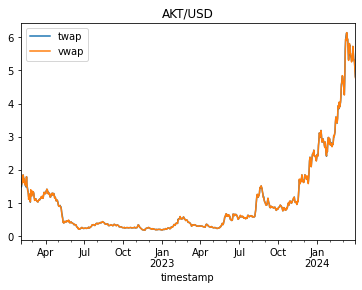

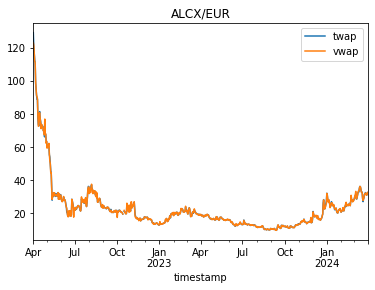

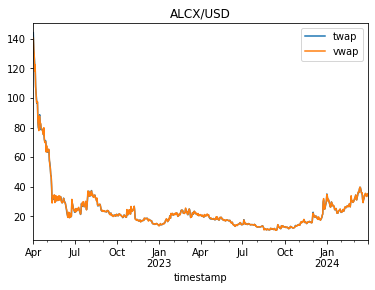

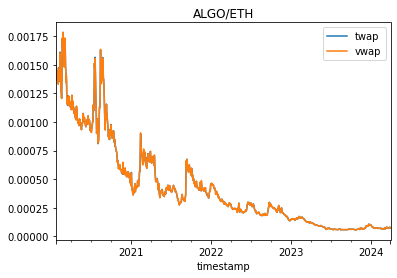

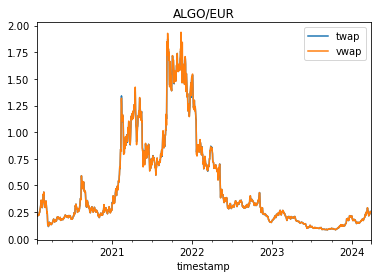

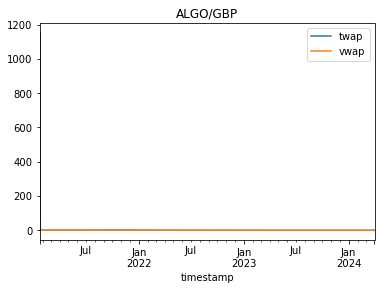

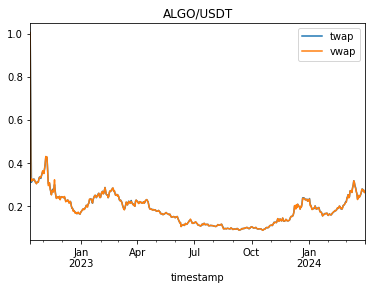

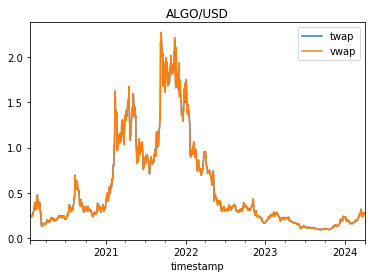

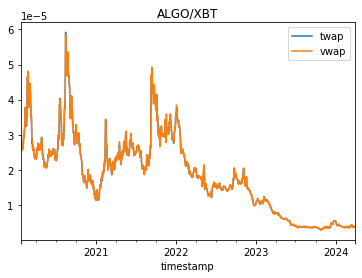

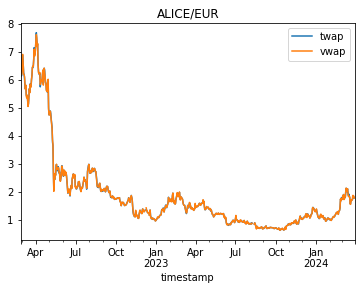

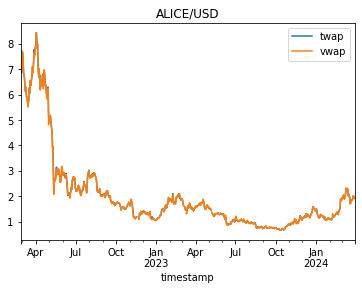

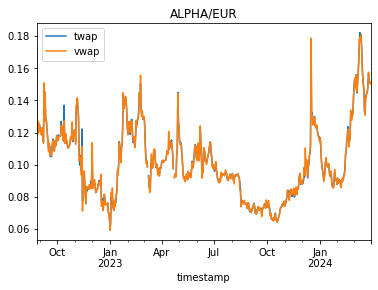

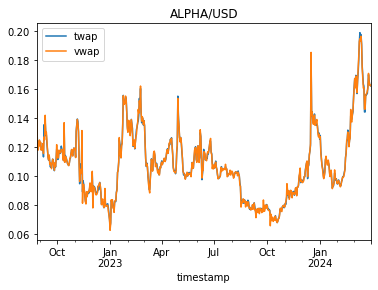

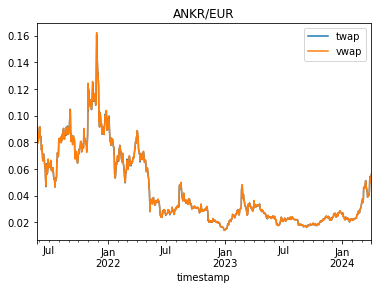

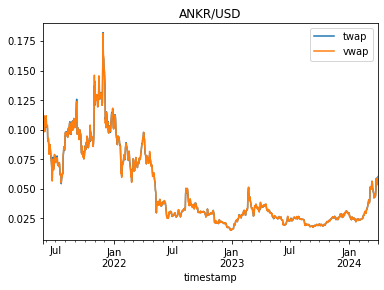

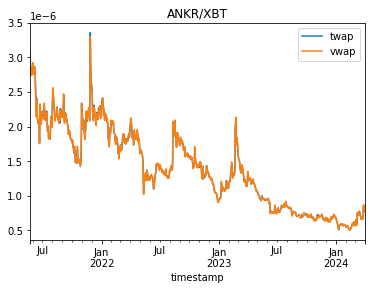

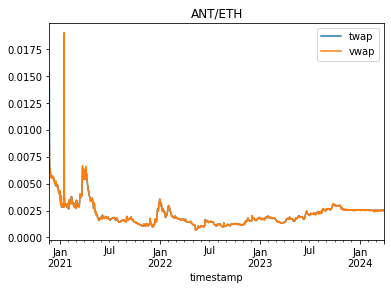

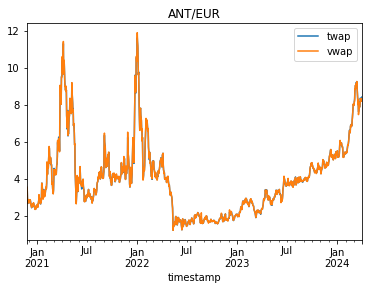

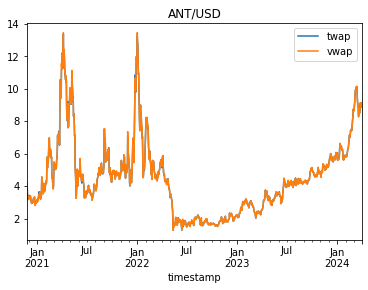

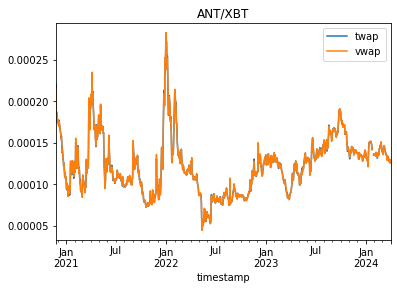

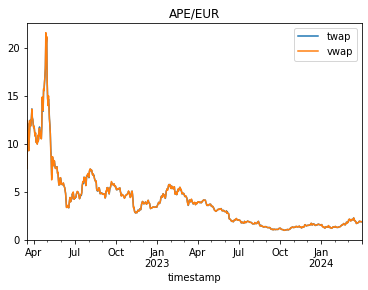

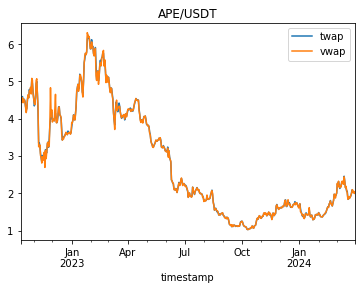

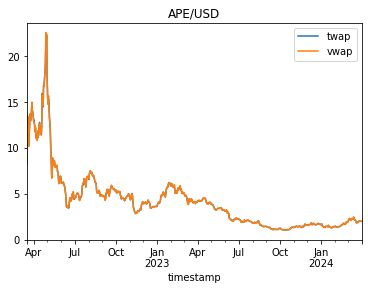

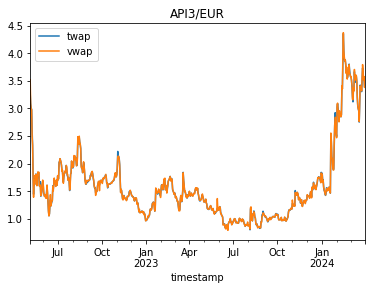

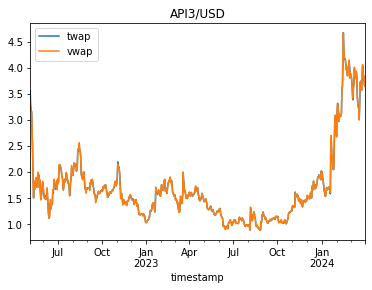

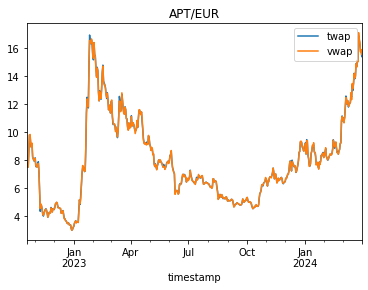

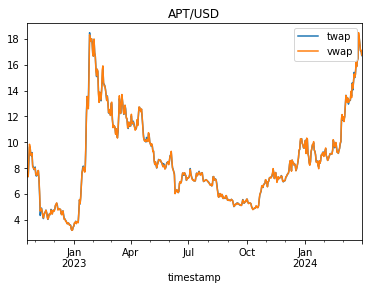

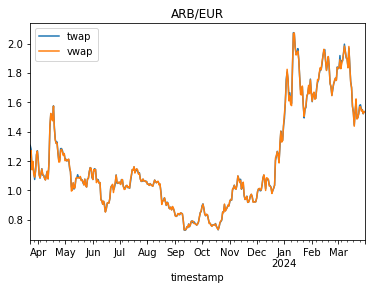

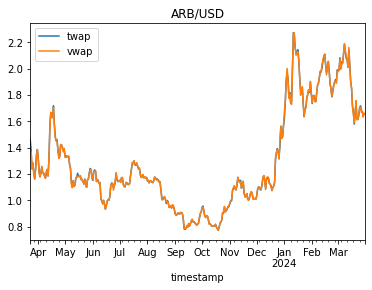

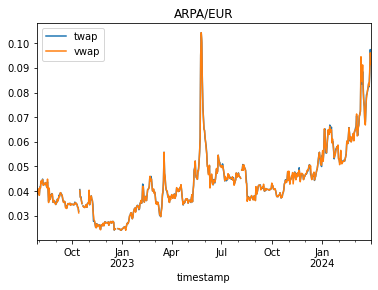

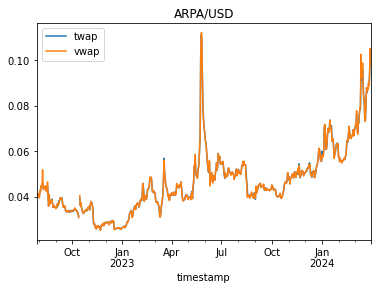

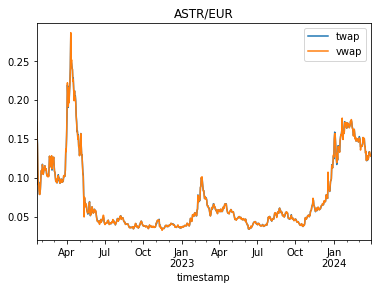

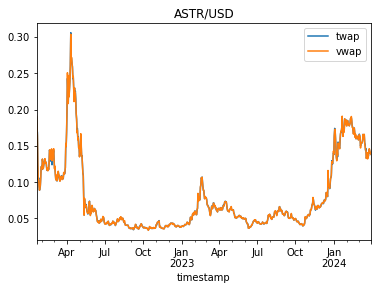

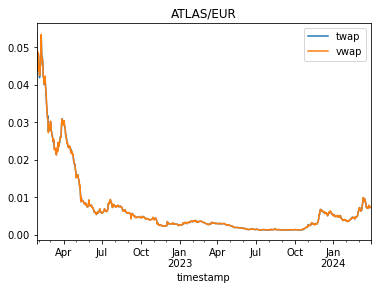

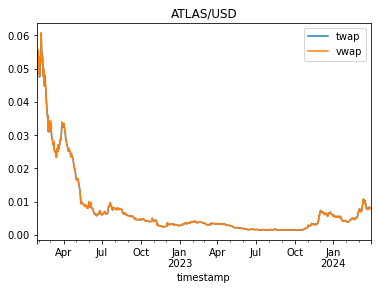

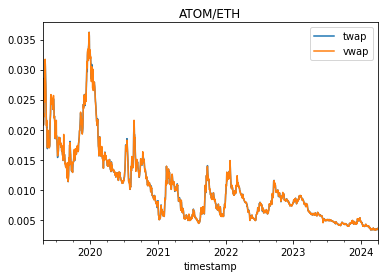

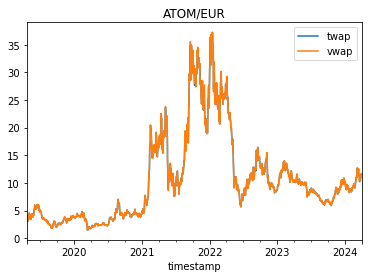

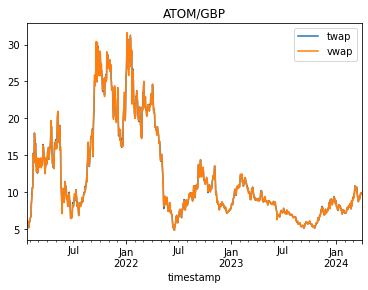

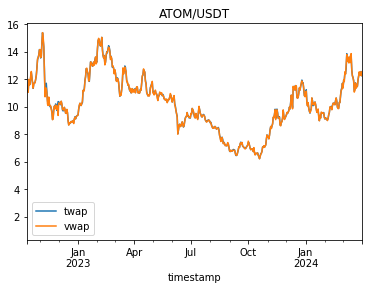

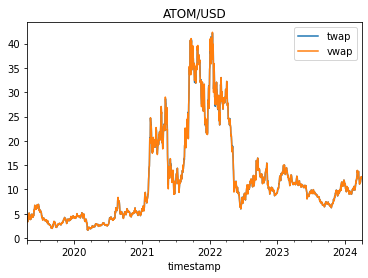

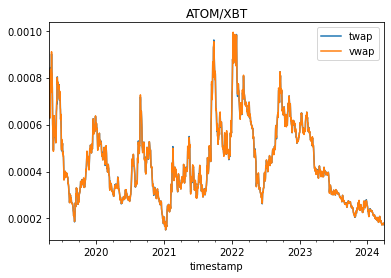

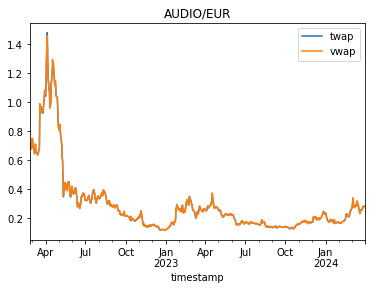

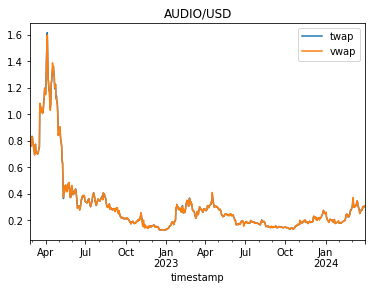

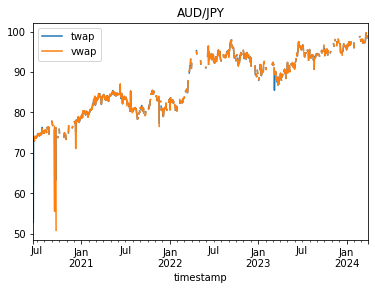

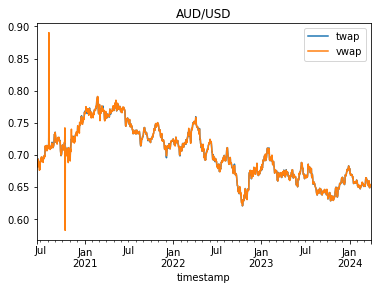

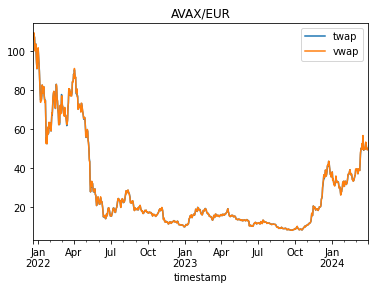

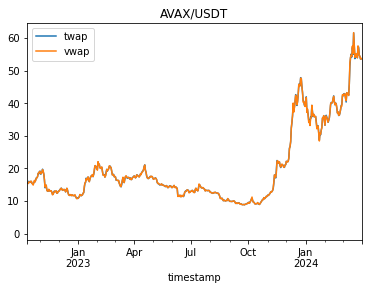

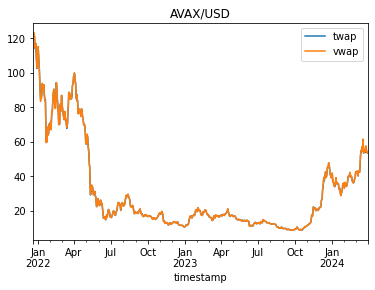

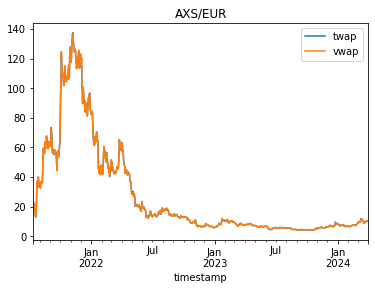

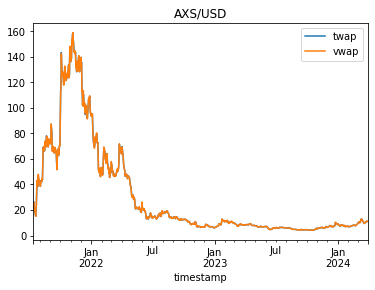

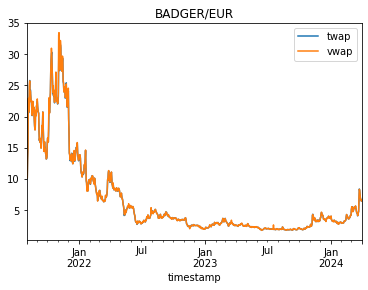

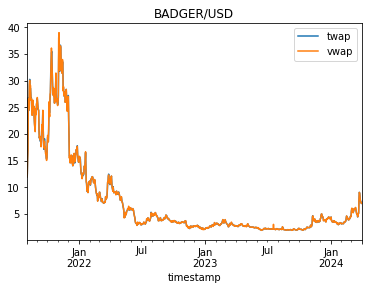

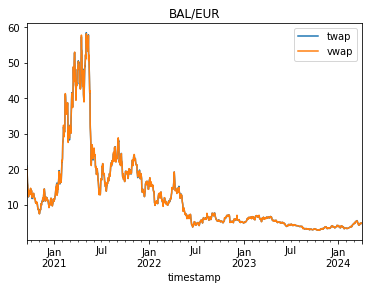

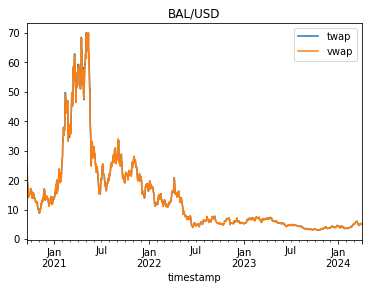

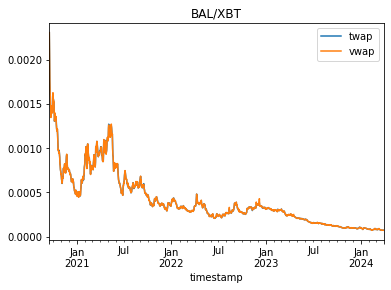

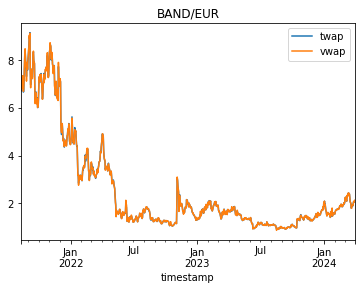

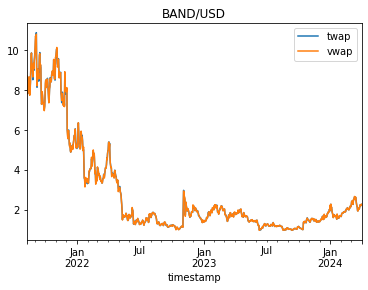

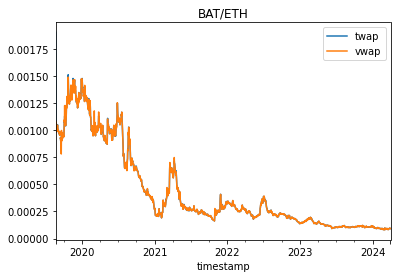

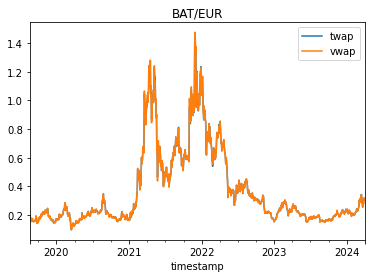

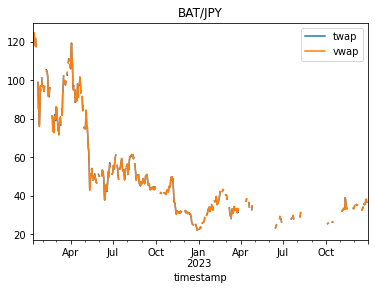

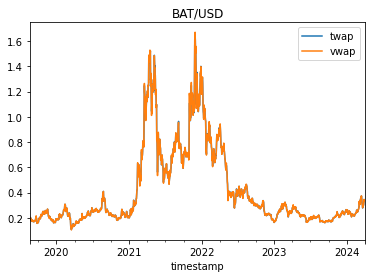

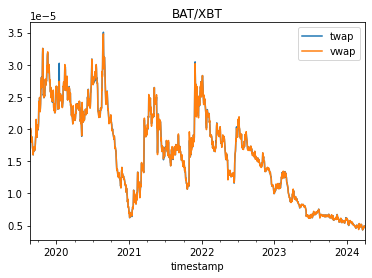

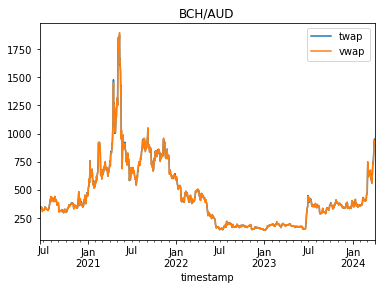

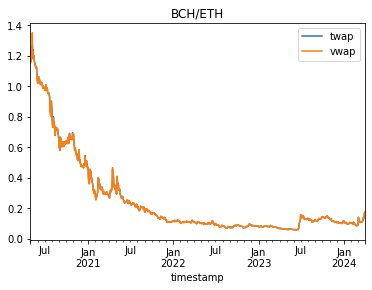

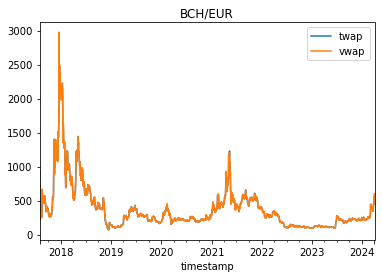

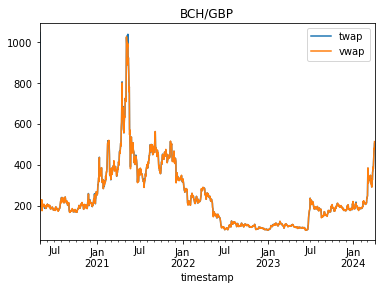

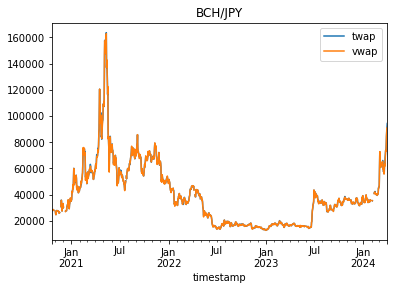

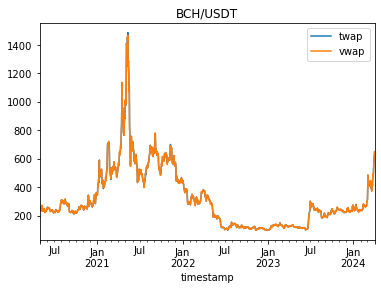

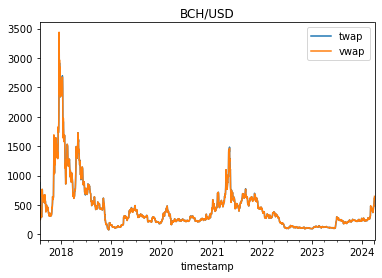

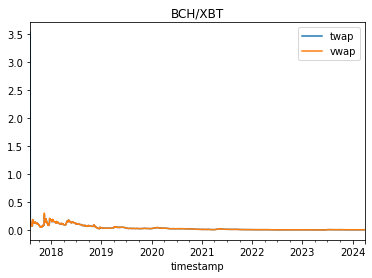

e620a1906b0142b5b230a15668ff667b/BEAM_EUR.parquet no numeric data to plot
e620a1906b0142b5b230a15668ff667b/BEAM_USD.parquet no numeric data to plot


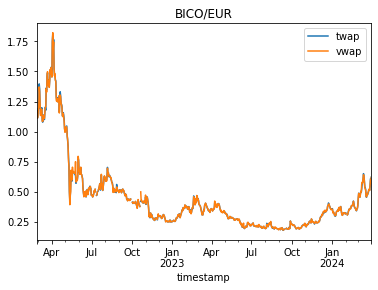

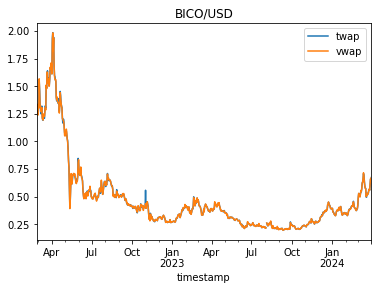

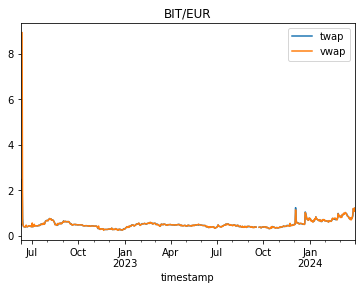

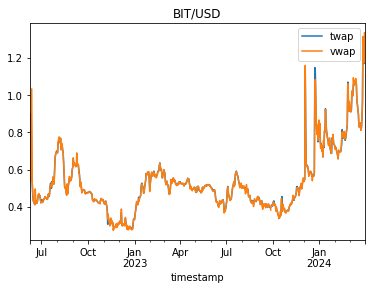

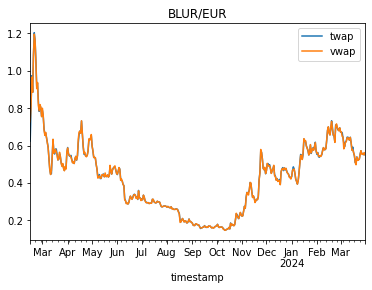

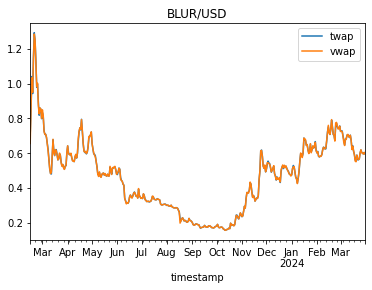

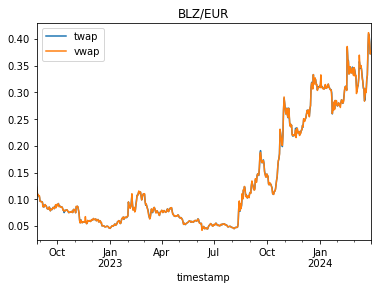

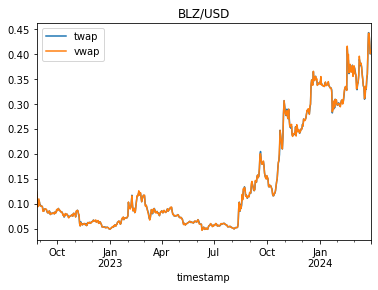

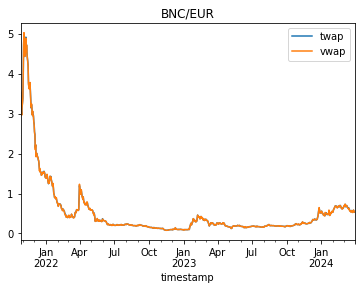

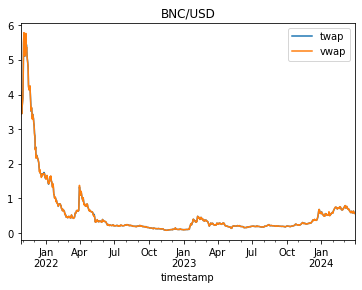

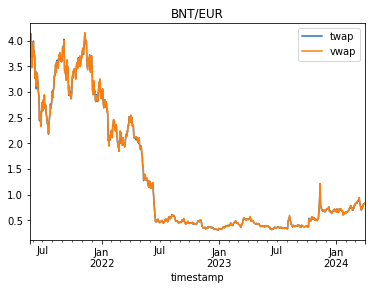

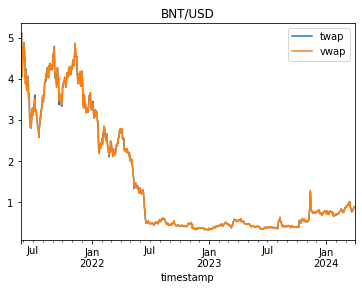

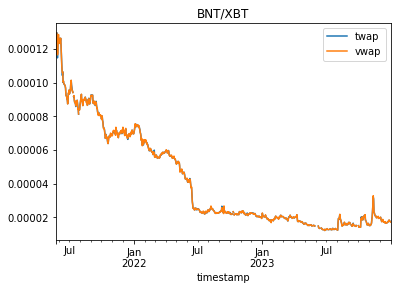

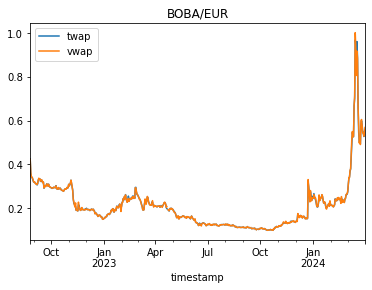

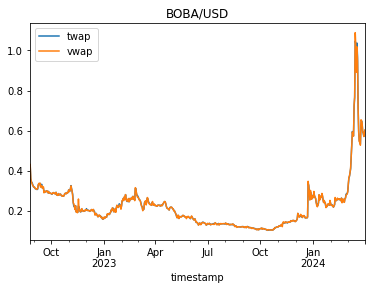

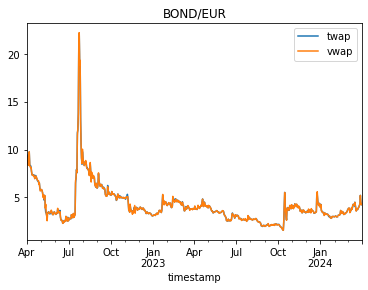

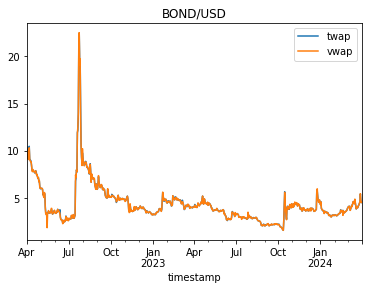

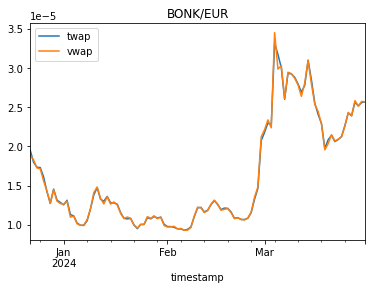

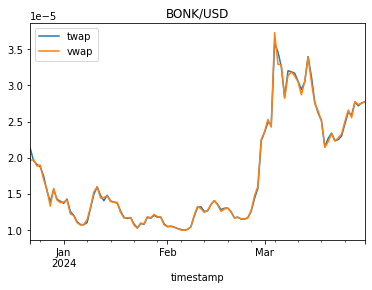

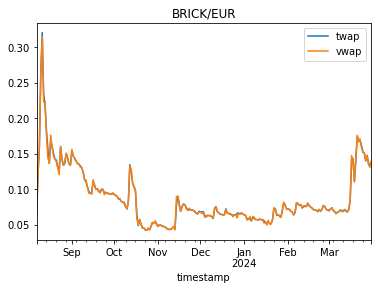

In [6]:
for i, row in pairs.iterrows():
    base, quote = row["base"], row["quote"]
    file = f"{version}/{base}_{quote}.parquet"

    try:
        df = pd.read_parquet(f"{version}/{base}_{quote}.parquet")
        df[["twap", "vwap"]].plot(title=f"{base}/{quote}")
        plt.show()
    except Exception as e:
        print(file, e)